# Real-Time Order Book Data

In [ ]:
pip install websockets -q

In [ ]:
import json
import asyncio
import websockets
import datetime
url = 'wss://ws-subscriptions-clob.polymarket.com/ws/market'
last_time_pong = datetime.datetime.now()
msgs = []

kamala_trump_yes_token = "112691550711713354714525509796202337193505769808087674259394206524293080902258"
kamala_trump_no_token = "40934908860656143479579576067633881276941830984503767038689094076378988206631"

trump_win_election_yes = "21742633143463906290569050155826241533067272736897614950488156847949938836455"
trump_win_election_no = "48331043336612883890938759509493159234755048973500640148014422747788308965732"

async with websockets.connect(url) as websocket:
    await websocket.send(json.dumps({"assets_ids":[trump_win_election_yes, trump_win_election_no],"type":"market"}))

    while True:
        m = await websocket.recv()
        if m != "PONG":
          last_time_pong = datetime.datetime.now()
        d = json.loads(m)
        print(d)
        if last_time_pong + datetime.timedelta(seconds=10) < datetime.datetime.now():
          await websocket.send("PING")
        else:
            msgs.append(d)


{'asks': [{'price': '0.999', 'size': '9100010'}, {'price': '0.998', 'size': '1050000'}, {'price': '0.997', 'size': '2000000'}, {'price': '0.99', 'size': '6215914.9'}, {'price': '0.989', 'size': '500000'}, {'price': '0.98', 'size': '10107.92'}, {'price': '0.97', 'size': '30300'}, {'price': '0.969', 'size': '25000'}, {'price': '0.95', 'size': '1020.62'}, {'price': '0.949', 'size': '1000'}, {'price': '0.91', 'size': '31834.84'}, {'price': '0.909', 'size': '20000'}, {'price': '0.9', 'size': '971.09'}, {'price': '0.89', 'size': '9054.66'}, {'price': '0.889', 'size': '1800'}, {'price': '0.88', 'size': '25912.48'}, {'price': '0.879', 'size': '20000'}, {'price': '0.877', 'size': '50000'}, {'price': '0.87', 'size': '8041.84'}, {'price': '0.86', 'size': '5'}, {'price': '0.85', 'size': '9125.76'}, {'price': '0.84', 'size': '50000'}, {'price': '0.839', 'size': '20000'}, {'price': '0.838', 'size': '10'}, {'price': '0.83', 'size': '5000'}, {'price': '0.81', 'size': '5000'}, {'price': '0.8', 'size': 

CancelledError: 

In [ ]:
import json
import asyncio
import websockets
import datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
# Lists to store data for plotting
times = []
volumes = []
trade_counts = []
spreads = []

# Function to update the plot
def update_plot():
    clear_output(wait=True)
    plt.figure(figsize=(12, 6))

    plt.subplot(3, 1, 1)
    plt.plot(times, volumes, label='Volume', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Volume')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(times, trade_counts, label='Trade Count', color='green')
    plt.xlabel('Time')
    plt.ylabel('Trade Count')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(times, spreads, label='Price Spread', color='red')
    plt.xlabel('Time')
    plt.ylabel('Price Spread')
    plt.legend()

    plt.tight_layout()
    plt.show()


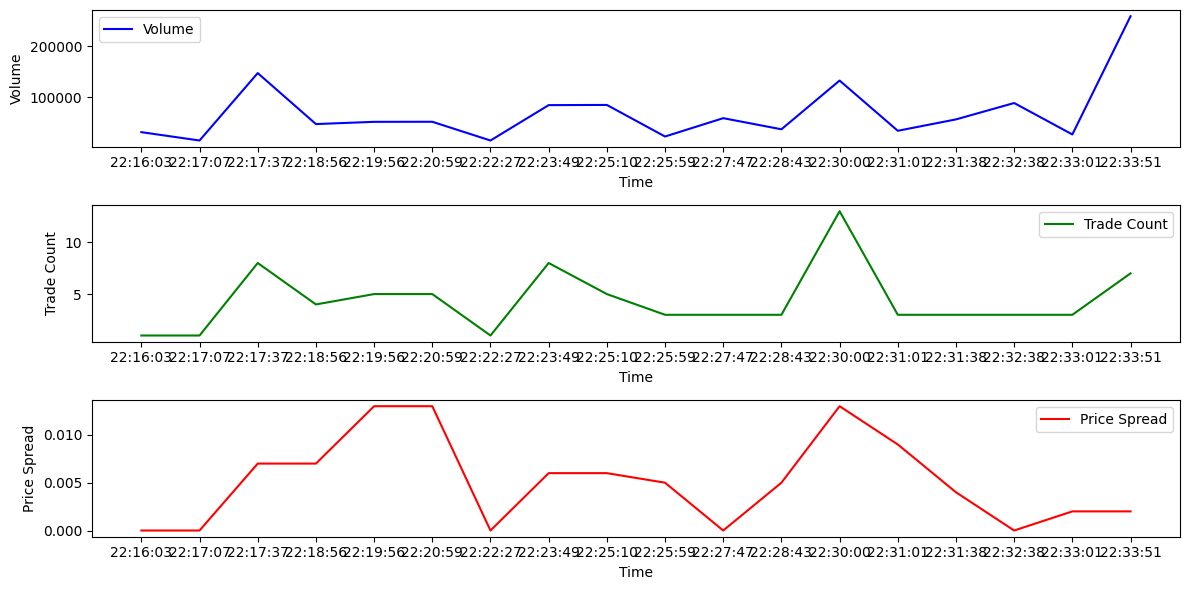

ConnectionClosedError: no close frame received or sent

In [ ]:
import json
import asyncio
import websockets
import datetime
url = 'wss://ws-subscriptions-clob.polymarket.com/ws/market'

last_time_pong = datetime.datetime.now()
msgs = []

# Initialize metrics
trade_count = 0
volume = 0
high_price = None
low_price = None

# To store the last minute metrics
last_minute_time = datetime.datetime.now()

async with websockets.connect(url) as websocket:
    print("CONNECTING")
    await websocket.send(json.dumps({"assets_ids":["21742633143463906290569050155826241533067272736897614950488156847949938836455",
                                                   #"48331043336612883890938759509493159234755048973500640148014422747788308965732"
                                                   ],"type":"market"}))
    print("CONNECTED")
    while True:
        m = await websocket.recv()
        if m == "PONG":
            last_time_pong = datetime.datetime.now()
        else:
            # Parse the message as JSON
            data = json.loads(m)
            # print(data)
            # Store the message
            msgs.append(data)

            # Extract necessary fields
            if data.get('event_type') == 'price_change' and data.get('side') == "BUY":
                price = float(data['price'])
                size = float(data['size'])
                timestamp = datetime.datetime.now()
                # Update metrics
                trade_count += 1
                volume += size

                if high_price is None or price > high_price:
                    high_price = price
                if low_price is None or price < low_price:
                    low_price = price

                # Check if a minute has passed
                if last_minute_time + datetime.timedelta(seconds=20) <= timestamp:
                    # Calculate price spread
                    price_spread = high_price - low_price
                     # Store the metrics for plotting
                    times.append(last_minute_time.strftime('%H:%M:%S'))
                    volumes.append(volume)
                    trade_counts.append(trade_count)
                    spreads.append(price_spread)
                    # Output the metrics for the last minute
                    # print(f"Time: {last_minute_time.strftime('%Y-%m-%d %H:%M:%S')}")
                    # print(f"Volume: {volume}")
                    # print(f"Trade Count: {trade_count}")
                    # print(f"Price Spread: {price_spread}")
                    # print('---')

                    # Reset metrics for the new minute
                    last_minute_time = timestamp
                    trade_count = 0
                    volume = 0
                    high_price = None
                    low_price = None

                     # Update the live plot
                    update_plot()


        # Send PING if necessary
        if last_time_pong + datetime.timedelta(seconds=10) < datetime.datetime.now():
            await websocket.send("PING")
